In [1]:

import skimage
import matplotlib.pyplot as plt
from utils_functions import scale_img,normlize_img,Stardist_Segmentation

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None
None


In [15]:
origin_image_1=skimage.io.imread('/Users/haoranyue/Documents/segmentation_data/overaly/denoise_images/P269_HumTORMP_TMA14_Scan1_component_data_DAPI_cropedtif.tif')


257760501.py (12): /Users/haoranyue/Documents/segmentation_data/P269_open_mask.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
257760501.py (15): /Users/haoranyue/Documents/segmentation_data/P269_cleand_mask.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
257760501.py (18): /Users/haoranyue/Documents/segmentation_data/P269_filled_mask.png is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.


(<matplotlib.image.AxesImage at 0x28ee4aaa0>,
 Text(0.5, 1.0, 'Hole-filled Mask'))

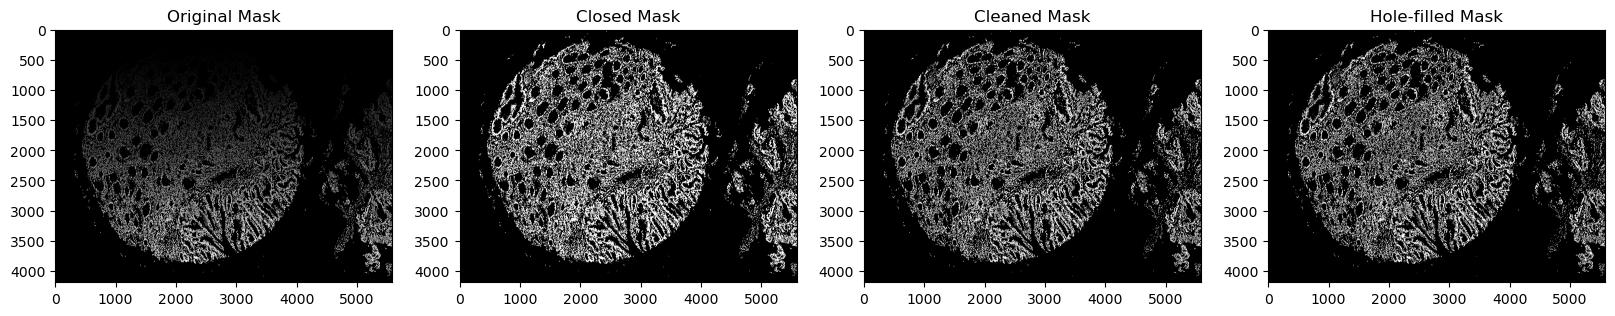

In [21]:
import numpy as np

1374995285.py (30): Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?


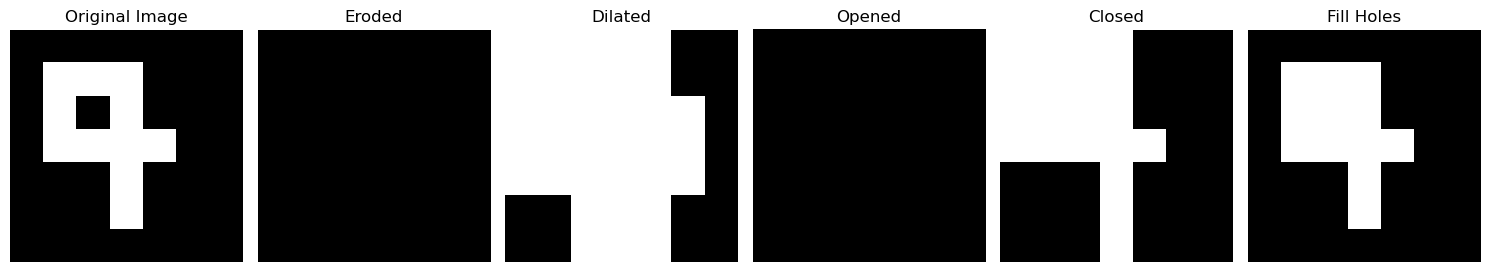

In [22]:
img=np.log2(scale_img(normlize_img(origin_image_1)))

In [9]:
skimage.io.imsave('/Users/haoranyue/Documents/segmentation_data/overaly/denoise_images/P269_HumTORMP_TMA14_Scan1_component_data_DAPI_croped_norm.tif',img)

30610


In [ ]:
origin_image_2=skimage.io.imread('/Users/haoranyue/Documents/segmentation_data/P269_HumTORMP_TMA14_Scan1_component_data_DAPI_scaled_adv_mask.tif')

In [18]:
skimage.io.imsave('/Users/haoranyue/Documents/segmentation_data/P269_check.tif',origin_image_1+inverted_mask)

In [3]:
plt.figure(figsize=(20,20))
plt.imshow(origin_image_1+origin_image_2, cmap='gray')
plt.show()

2023-10-19 10:56:37.098396: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 14s 14s/step
[    0     1     2 ... 30984 30985 30986]


In [21]:
inverted_mask = 255 - origin_image

1505399648.py (1): /Users/haoranyue/Documents/segmentation_data/P269_HumTORMP_TMA14_Scan1_component_data_DAPI_StartDist_mask.tif is a low contrast image


In [14]:
skimage.io.imsave('/Users/haoranyue/Documents/segmentation_data/P269_HumTORMP_TMA14_Scan1_component_data_DAPI_scaled_start_dist_mask_inverted.tif',inverted_mask)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Scale your image from [0, 1] to [0, 255] and convert to uint8 type
scaled_img = np.clip(origin_image * 255, 0, 255).astype(np.uint8)

# Adaptive Thresholding
thresh_img = cv2.adaptiveThreshold(scaled_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                   cv2.THRESH_BINARY, 11, 2)

plt.imshow(thresh_img, cmap='gray')
plt.show()

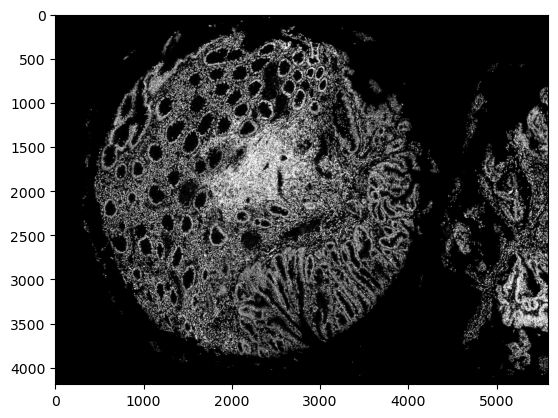

In [15]:
norm_img=normlize_img(origin_image)


In [16]:
segmented_cells, cell_number=Stardist_Segmentation(norm_img)

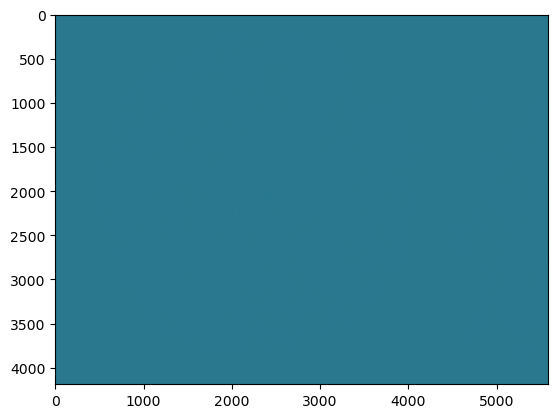

In [17]:
cell_number

In [7]:
skimage.io.imsave('/Users/haoranyue/Documents/segmentation_data/P269_HumTORMP_TMA14_Scan1_component_data_DAPI_scaled_start_dist_mask.tif',segmented_cells)

In [ ]:
import numpy as np
import tifffile as tiff

# Load the data from the .npy file
data = np.load('/Users/haoranyue/Documents/segmentation_data/P269_HumTORMP_TMA14_Scan1_component_data_DAPI_scaled_seg.npy',allow_pickle=True)
if data.dtype != np.float32:
    data = data.astype(np.float32)

# Save the data to a .tif file
tiff.imwrite('/Users/haoranyue/Documents/segmentation_data/P269_HumTORMP_TMA14_Scan1_component_data_DAPI_scaled_seg.tif', data)

In [5]:
# Create a 2x4 grid of subplots with a specified figure size
fig, ax = plt.subplots(2, 4, figsize=(30, 15))

# Loop through the frames of the image and display them
for i in range(origin_image.shape[0]):
    if i < 4:
        ax[0, i].imshow(origin_image[i],aspect='auto')
        ax[0, i].axis('off')  # Turn off axis numbers and ticks
    elif 4 <= i < 8:  # Corrected this condition
        ax[1, i-4].imshow(origin_image[i],aspect='auto')
        ax[1, i-4].axis('off')  # Turn off axis numbers and ticks

plt.show()


Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
    def _predict_instances_generator(self, img, axes=None, normalizer=None,
                                     sparse=True,
                                     prob_thresh=None, nms_thresh=None,
                                     scale=None,
                                     n_tiles=None, show_tile_progress=True,
                                     verbose=False,
                                     return_labels=True,
                                     predict_kwargs=None, nms_kwargs=None,
                                     overlap_label=None, return_predict=False):
        """Predict instance segmentation from input image.

        Parameters
        ----------
        img : :class:`numpy.ndarray`
            Input image
        axes : str or None
            Axes of the in